> Carlos Munoz Ebratt

## Titanic - Machine Learning from Disaster

> This is my "Project 1" in the "Big Data Visualization for Business Communications" course. I'm planning to use machine learning to create a model that predicts which passengers survived the Titanic shipwreck. This is also a competition in Kaggle so I decided to do it to challenge myself. Let's see how this goes:

### Instructions:

You are tasked with performing analysis on a regression dataset of your choice from Kaggle. Your goal is to predict a target variable based on a set of features. Follow the steps outlined below to conduct a comprehensive analysis:

1. Upload the Dataset: Obtain a regression dataset of your choice from Kaggle and upload it to your working environment.

2. Describe the Dataset: Provide a brief overview of the dataset, including the number of observations, features, and a description of each variable.
3. Perform Data Wrangling/Encoding: Clean the dataset by handling missing values, duplicates, and outliers. Perform any necessary encoding for categorical variables.
3. Define Features and Target Variable: Define the features (independent variables) and the target variable (dependent variable) that you will be using for analysis.
4. Perform Basic EDA: Use various visualization techniques such as barcharts, histograms, scatterplots, facetgrid, and boxplots to explore the relationships between variables. Choose any two visualization techniques of your choice.
Create Heatmap: Create a heatmap to visualize the correlation between features and the target variable.
5. Split the Data into Train and Test Sets: Split the dataset into training and testing sets using a ratio of 80/20 or 70/30. 
Choose a random state of 0 or 42 for consistency.
6. Utilize Standard Scaling: Standardize the features using standard scaling to ensure all variables are on the same scale.
7. Perform Linear Regression: Implement linear regression to predict the target variable. Determine the accuracy of the model using appropriate evaluation metrics.
8. Upload Submission: Compile your analysis and code into a Jupyter Notebook (.ipynb) or Google Colab. Additionally, create a PDF version of your notebook for submission.
9. Upload to GitHub: Upload your Jupyter Notebook and PDF submission to your GitHub repository for version control and sharing.


**Finally,** Prepare a presentation to explain your project findings to the class. Include an overview of the dataset, data preprocessing steps, model implementation, evaluation metrics, and key insights.


#### Let's do it

First, let's import all the neccesary libraries

In [191]:
# Importing the neccessary libraries

# For data manipulation
import pandas as pd


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# For Data Viz
import matplotlib.pyplot as plt
import seaborn as sns

# for data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#### 1. Upload the dataset

In [192]:
df = pd.read_csv('train.csv')
df1 = pd.read_csv('test.csv')

In [193]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 2. Describe the dataset

Overview of the features:

`survival:` Indicates whether the passenger survives or not (0=No 1=Yes)  
`pclass:` Indicates the passenger trip class (1 = 1st, 2 = 2nd, 3 = 3rd)  
`sex:` Sex of the passenger  
`Age:` Age in years  
`sibsp:` # of siblings / spouses aboard the Titanic  
`parch:` # of parents / children aboard the Titanic  
`ticket:` Ticket number  
`fare:` Passenger fare  
`cabin:` Cabin number  
`embarked:` Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)  


Variable Notes:

`pclass:` A proxy for socio-economic status (SES)  
* 1st = Upper  
* 2nd = Middle  
* 3rd = Lower 

`age:` Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

`sibsp:` The dataset defines family relations in this way...  
* Sibling = brother, sister, stepbrother, stepsister  
* Spouse = husband, wife (mistresses and fiancés were ignored)  

`parch:` The dataset defines family relations in this way...  
* Parent = mother, father  
* Child = daughter, son, stepdaughter, stepson  
* Some children travelled only with a nanny, therefore parch=0 for them.  

In [194]:
# Describing the data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [195]:
# checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


> The previous output specifies that the data set has 12 columns and 891 rows. It also states that the data types within the dataset are all correct. For this modeling, I was provided with two similar datasets as follows: 

> `Train.csv` will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.  
The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

#### 3. Perform Data Wrangling:

##### Handling missing values

In [196]:
# Checking for missing values
df.isna().sum().sort_values(ascending=False)


Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

> Notice that the data contains missing values in some features. There are 687 null values in "Cabin", 177 null values in "Age", and 2 null values in "Embarked". I'll need to address these missing values before proceeding with the analysis. To decide, it is better first to understand the data type in each column.

> As I discovered previously, the column `Cabin` and `Embarked` are categorical, and the `Age` is numerical. I will use median and mode imputation for `Age` and `Embarked` respectively, and I will drop `Cabin` given the number of null, the data type, and the possible relationship with `Pclass` feature.


In [197]:
# Understanding the Cabin values
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [198]:
# Median imputation for Age column
df['Age'] = df['Age'].fillna(df['Age'].median())

# Mode imputation for Embarked column
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Dropping the Cabin column
df = df.drop('Cabin', axis=1)

In [199]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [200]:
# Checking for missing values
df.isna().sum().sort_values(ascending=False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

##### Cheching for duplicates

In [201]:
# Checking for duplicates
df.duplicated().sum()


0

> No duplicated rows found

##### Checking outliers

> Let's use Interquartile Range (IQR) to see how the outliers are distributed in the dataset. This method focuses on the quartiles of the data distribution. Outliers fall outside the upper and lower bounds calculated using the IQR and a threshold multiplier (typically 1.5). IQR is less sensitive to extreme outliers compared to z-scores and works well for skewed data.

In [202]:
# Identifying outliers in each column

def get_outliers(df):
    outliers = {}
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    return outliers

outliers = get_outliers(df)

In [203]:
# Dataframe with outliers
outliers_df = pd.DataFrame(outliers.items(), columns=['column_name', 'outliers_count'])
outliers_df = outliers_df.sort_values(by='outliers_count', ascending=False)
outliers_df.head(10)

,column_name,outliers_count
5,Parch,213
6,Fare,116
3,Age,66
4,SibSp,46
0,PassengerId,0
1,Survived,0
2,Pclass,0


> Notice that there are 4 columns with potentially outliers values. Before taking any action, it's important to understand the outliers. Are they genuine data points or are they errors is the main question. I will explore more by plotting a `Boxplot` before any action.

C:\Users\carlo\AppData\Local\Temp\ipykernel_4692\1313136449.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0, 0], data=df, x='Age', palette='Set1')
C:\Users\carlo\AppData\Local\Temp\ipykernel_4692\1313136449.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0, 1], data=df, x='Fare', palette='Set2')
C:\Users\carlo\AppData\Local\Temp\ipykernel_4692\1313136449.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1, 0], data=df, x='SibSp', palette='Blues_r')
C:\Users\carlo\AppData\Local\Temp\ipykernel_4692\131313644

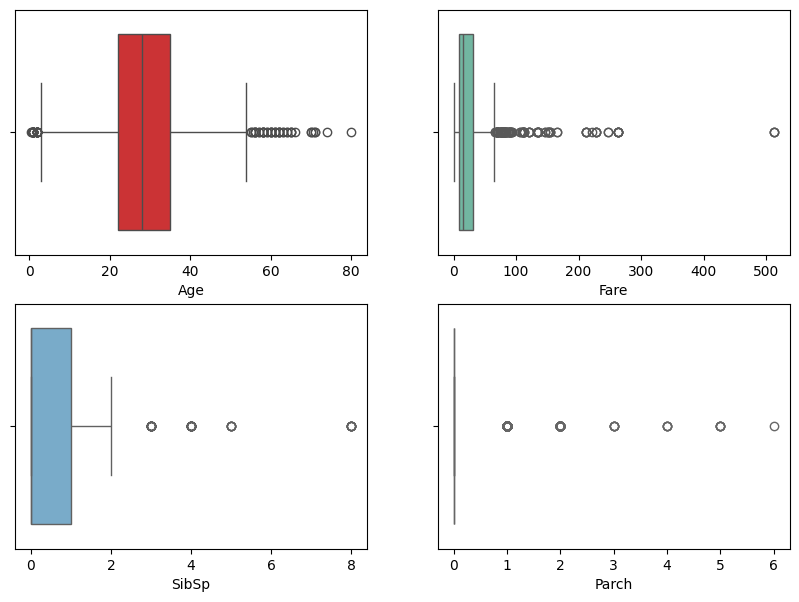

In [204]:
# Boxplots with outliers
fig, axes = plt.subplots(2, 2, figsize=(10, 7))
sns.boxplot(ax=axes[0, 0], data=df, x='Age', palette='Set1')
sns.boxplot(ax=axes[0, 1], data=df, x='Fare', palette='Set2')
sns.boxplot(ax=axes[1, 0], data=df, x='SibSp', palette='Blues_r')
sns.boxplot(ax=axes[1, 1], data=df, x='Parch', palette='OrRd')
plt.show()


> Based on the previous graphics and the outliers count, I can infer the following:  
> * The age, the number of siblings `(Sibsp)`, and the number of parents/children aboard the Titanic`(Parch)` seems to be authentical data points. Both shows a large family of 2 parents and 6 children. Also notice that in `Age` column I have 80 as the maximun which is normal. However, I have doubts about the `Fare`. It is possible for a passenger to pay more than £500 when most of the passengers paid less than £50 and maximum £300? 

In [205]:
# Filtering passengers with fare greather than £500
df[df['Fare'] > 500]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


> Domain Research:  
`Mr Thomas Drake Martinez Cardeza`, 36, was a wealthy banker from Germantown, PA. He was married to Mary B M Racine, born 27 March 1880 in Besançon, France, who had emigrated to America in 1883. He boarded the Titanic at Cherbourg with his mother Charlotte Cardeza, his Mother's Maid Miss `Annie Moore Ward`, and his manservant `Gustave Lesueur`. They occupied one of the two most luxurious suites on board (B51/3/5, ticket 17755, £512, 6s).  

> With this research I concluded the outliers are not outliers but legitim datapoints.

#### 4. Perform Basic EDA

> At this point I would like to understand better the features and the dataset in overall by plotting a few Graphs.
I woul like to start by checking whether the dataset is balanced or not in terms of the outcome variable `Survived`.

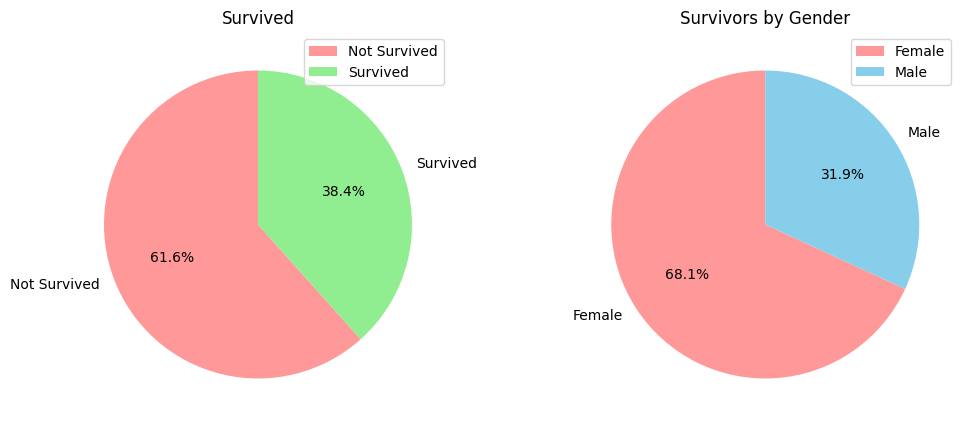

In [206]:
# Two pie charts. One for the survived and the other survivors by gender
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Pie chart for Survived
axes[0].pie(df['Survived'].value_counts(), labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','lightgreen'])
axes[0].set_title('Survived')
axes[0].legend()


# Filtering the survivors
survived = df[df['Survived'] == 1]

# Pie chart for Survivors by Gender
axes[1].pie(survived['Sex'].value_counts(), labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','skyblue'])
axes[1].set_title('Survivors by Gender')
axes[1].legend()
plt.show()

> Notice that there are a `38%` of passengers who survived, and `68%` of the survived where females. A question that arises at this moment is the **percentage of kids who survived**. Let's plot a histogram to see this distribution.

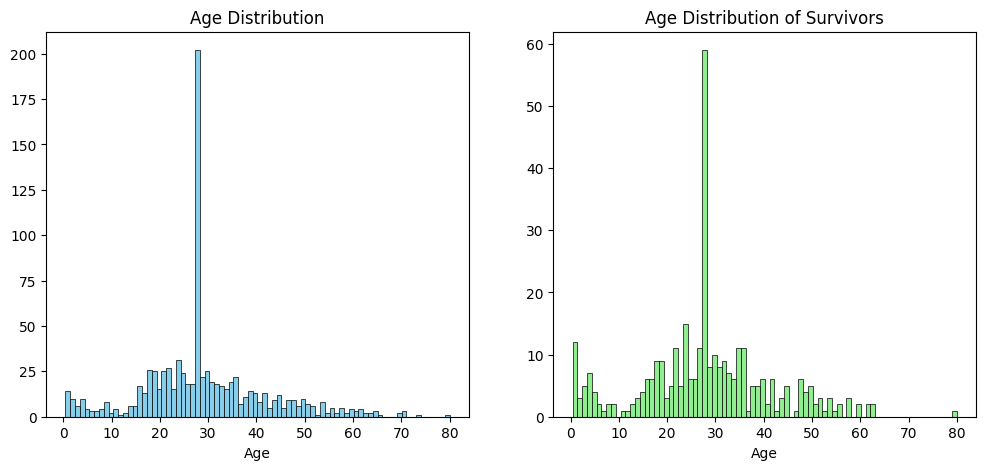

In [207]:
# two histograms for the age distribution of the passengers age and the survivors age
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for the Age distribution
axes[0].hist(df['Age'], bins=80, color='skyblue', edgecolor='black', linewidth=0.5)
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')

# Histogram for the Age distribution of the survivors
axes[1].hist(survived['Age'], bins=80, color='lightgreen', edgecolor='black', linewidth=0.5)
axes[1].set_title('Age Distribution of Survivors')
axes[1].set_xlabel('Age')
plt.show()

> For this 2 histograms I infer that the distribution for both "all passengers" and "survivor passangers" follows a normal distribution.

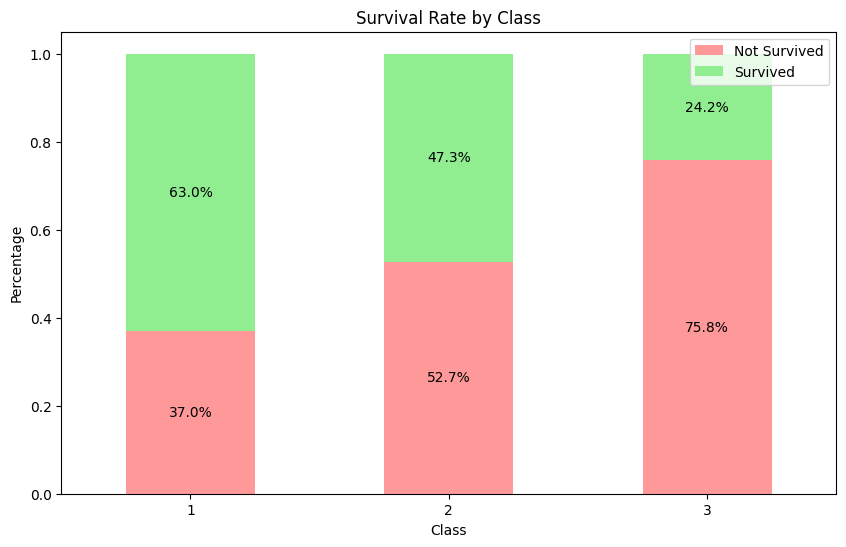

In [208]:
#Stacked barplot by class and survival

# Grouping by class and survival
class_survived = df.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack()
ax = class_survived.plot(kind='bar', stacked=True, color=['#ff9999','lightgreen'], figsize=(10, 6))

# Insert percentage value in each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1%}', (x + width/2, y + height/2), ha='center', va='center')

plt.title('Survival Rate by Class')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(['Not Survived', 'Survived'])
plt.show()


> As I can see here the proportion of passengers who survived grows as the passenger class increments. Those who paid more had more chance to survive.

##### Adding new features

> Now, I want to create a new column base on the age to check if age had an impact on the change of surviving. The groups will be: Infants 0 to 2 years, children 3 to 12 years, teenagers 13 to 19 years, adults 20 to 64 years, and seniors 65 and above

In [209]:
# Age by group
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 2, 12, 19, 64, 100], labels=['Infants', 'Children', 'Teenagers', 'Adults', 'Seniors'])


In [210]:
# family size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [211]:
# Ticket Grouping: Consider extracting the prefix from the ticket number to create a new categorical feature.

df['TicketPrefix'] = df['Ticket'].apply(lambda x: x.split(' ')[0].replace('.', '').replace('/', '').lower() if len(x.split(' ')) > 1 else 'None')


In [212]:
df[['Name', 'Age', 'AgeGroup', 'FamilySize','TicketPrefix']].tail(20)

,Name,Age,AgeGroup,FamilySize,TicketPrefix
871,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",47.0,Adults,3,None
872,"Carlsson, Mr. Frans Olof",33.0,Adults,1,None
873,"Vander Cruyssen, Mr. Victor",47.0,Adults,1,None
874,"Abelson, Mrs. Samuel (Hannah Wizosky)",28.0,Adults,2,ppp
875,"Najib, Miss. Adele Kiamie ""Jane""",15.0,Teenagers,1,None
876,"Gustafsson, Mr. Alfred Ossian",20.0,Adults,1,None
877,"Petroff, Mr. Nedelio",19.0,Teenagers,1,None
878,"Laleff, Mr. Kristo",28.0,Adults,1,None
879,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",56.0,Adults,2,None
880,"Shelley, Mrs. William (Imanita Parrish Hall)",25.0,Adults,2,None


In [213]:
df['TicketPrefix'].unique()

array(['a5', 'pc', 'stono2', 'None', 'pp', 'ca', 'scparis', 'sca4', 'a4',
       'sp', 'soc', 'wc', 'sotonoq', 'wep', 'stono', 'c', 'sop', 'fa',
       'fcc', 'swpp', 'scow', 'ppp', 'sc', 'scah', 'as', 'sopp', 'fc',
       'sotono2', 'casoton'], dtype=object)

##### Enconding

Let's check unique values for object type columns

In [214]:
# Review again the datatypes by using the info method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   891 non-null    int64   
 1   Survived      891 non-null    int64   
 2   Pclass        891 non-null    int64   
 3   Name          891 non-null    object  
 4   Sex           891 non-null    object  
 5   Age           891 non-null    float64 
 6   SibSp         891 non-null    int64   
 7   Parch         891 non-null    int64   
 8   Ticket        891 non-null    object  
 9   Fare          891 non-null    float64 
 10  Embarked      891 non-null    object  
 11  AgeGroup      891 non-null    category
 12  FamilySize    891 non-null    int64   
 13  TicketPrefix  891 non-null    object  
dtypes: category(1), float64(2), int64(6), object(5)
memory usage: 91.7+ KB


> Notice that there are 5 object type features: Name, Sex, Ticket, Embarked, TicketPrefix, and one category-type feature: AgeGroup
For these 6 features I will encode `Sex`, `Embarked`, ``TicketPrefix`` and ``AgeGroup``. which have authentical categorical values

In [215]:
# Using LabelEncoder to encode the categorical columns
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])
df['AgeGroup'] = le.fit_transform(df['AgeGroup'])
df['TicketPrefix'] = le.fit_transform(df['TicketPrefix'])

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    int32  
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Embarked      891 non-null    int32  
 11  AgeGroup      891 non-null    int32  
 12  FamilySize    891 non-null    int64  
 13  TicketPrefix  891 non-null    int32  
dtypes: float64(2), int32(4), int64(6), object(2)
memory usage: 83.7+ KB


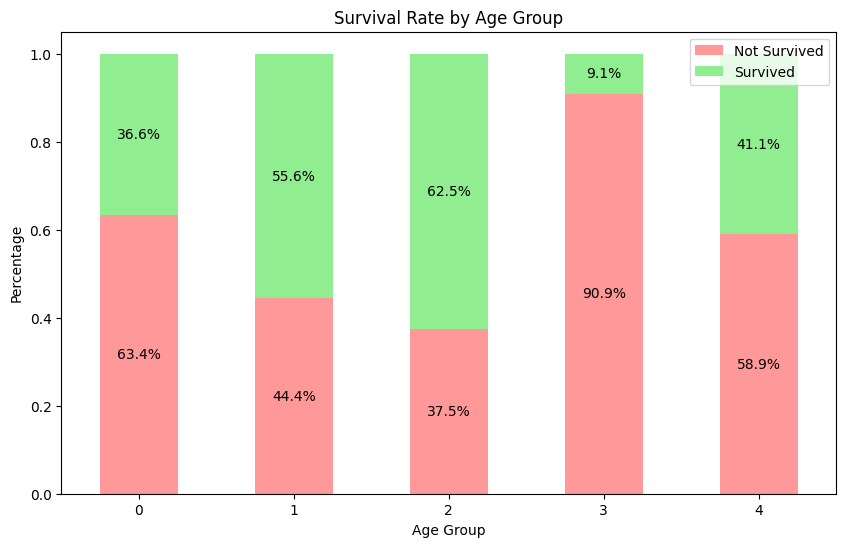

In [217]:
# Stacked bar survived by agegroup
agegroup_survived = df.groupby('AgeGroup')['Survived'].value_counts(normalize=True).unstack()
agegroup_survived = agegroup_survived.fillna(0)
agegroup_survived = agegroup_survived.reset_index()
agegroup_survived = agegroup_survived.sort_values(by='AgeGroup', ascending=True)
agegroup_survived = agegroup_survived.set_index('AgeGroup')
ax = agegroup_survived.plot(kind='bar', stacked=True, color=['#ff9999','lightgreen'], figsize=(10, 6))

# Insert percentage value in each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1%}', (x + width/2, y + height/2), ha='center', va='center')

plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(['Not Survived', 'Survived'])
plt.show()


> So, the conclusion here is that the younger you were the more likely to survive you were.

#### 5. Define Features and Target Variable

For this step I wll isolate the predictors and target variable in X and Y respectively.

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    int32  
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Embarked      891 non-null    int32  
 11  AgeGroup      891 non-null    int32  
 12  FamilySize    891 non-null    int64  
 13  TicketPrefix  891 non-null    int32  
dtypes: float64(2), int32(4), int64(6), object(2)
memory usage: 83.7+ KB


> The predictors, based on the previos EDA, will be:
* `Pclass`
* `Sex`
* `Age`
* `SibSp`
* `Parch`
* `Fare`
* `Embarked`

> The Target variable will be:
* `Survived`

In [219]:
x = df.drop(['PassengerId', 'Name', 'Ticket', 'Survived',], axis=1)
y = df['Survived']

#### 6. Create Heatmap

> Next step for me is to check multicollinearity between features to drop if necessary. To do so, I will plot a heat map using the independent variables or predictors.

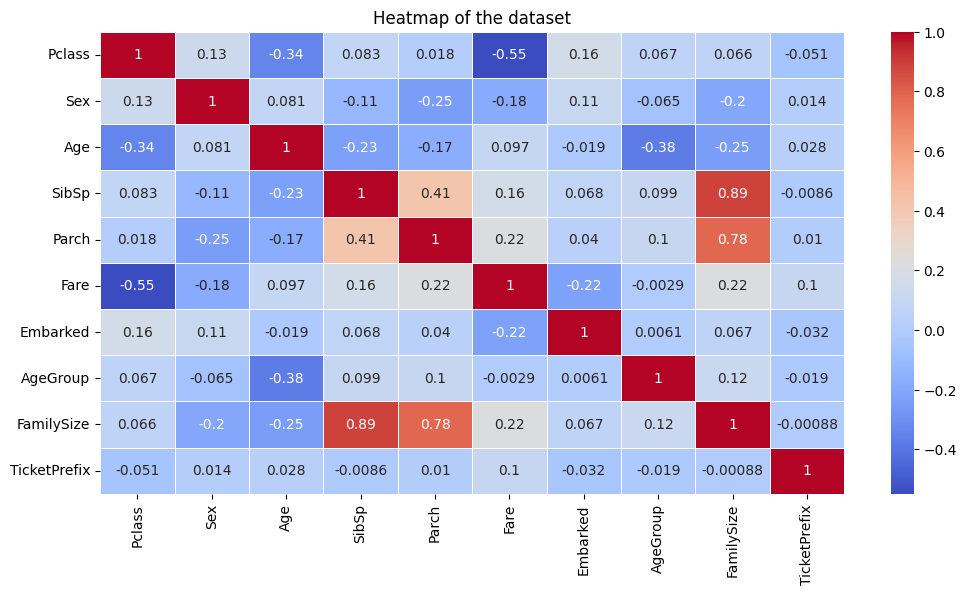

In [220]:
# Heatmap of the dataset
plt.figure(figsize=(12, 6))
sns.heatmap(x.corr(), annot=True, cmap='coolwarm', linewidth=.5) 
plt.title('Heatmap of the dataset')
plt.show()

> The `HeatMap` confirms the correlation between `Sex` and `Survived`, and also a correlation between `PClass` and `Survived`. This helps me to determine that these two features are important predictors for the model.

#### 7. Split the Data into Train and Test Sets

In [223]:
#splitting the data into training and testing sets
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


#### 8. Utilize Standard Scaling

In [224]:
#Scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#### 9. Modeling a Deep Learining Model

In [228]:
import tensorflow as tf
from tensorflow.keras import layers

def build_model(hp):
    model = tf.keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units', min_value=16, max_value=128, step=16), activation='relu', input_shape=(x_train.shape[1],)))
    model.add(layers.Dropout(rate=hp.Float('dropout', 0.2, 0.5, step=0.1)))
    
    for i in range(hp.Int('num_layers', 1, 3)):  # Adjust the number of layers
        model.add(layers.Dense(units=hp.Int(f'units_{i}', 16, 128, 16), activation='relu'))
        model.add(layers.Dropout(rate=hp.Float(f'dropout_{i}', 0.2, 0.5, step=0.1)))

    model.add(layers.Dense(1, activation='sigmoid'))  # For binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [236]:
from kerastuner.tuners import RandomSearch

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Number of different models to try
    executions_per_trial=1,
    directory='my_dir',
    project_name='titanic_tuning'
)

tuner.search(x_train, y_train, epochs=50, validation_data=(x_train, y_train))


Trial 10 Complete [00h 00m 08s]
val_accuracy: 0.8623595237731934

Best val_accuracy So Far: 0.8764045238494873
Total elapsed time: 00h 01m 29s


In [237]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]


c:\Users\carlo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\carlo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [238]:
# print the best hyperparameters
best_hyperparameters.values



{'units': 80,
 'dropout': 0.2,
 'num_layers': 2,
 'units_0': 128,
 'dropout_0': 0.30000000000000004,
 'units_1': 48,
 'dropout_1': 0.2,
 'units_2': 48,
 'dropout_2': 0.30000000000000004}

In [239]:
# Using the best model

history = best_model.fit(x_train, y_train, epochs=50, validation_data=(x_train, y_train))

loss, accuracy = best_model.evaluate(x_train, y_train)
print(f'Validation Accuracy: {accuracy:.4f}')

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8465 - loss: 0.3592 - val_accuracy: 0.8652 - val_loss: 0.3173
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8707 - loss: 0.3495 - val_accuracy: 0.8652 - val_loss: 0.3180
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8811 - loss: 0.3246 - val_accuracy: 0.8708 - val_loss: 0.3154
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8563 - loss: 0.3704 - val_accuracy: 0.8708 - val_loss: 0.3165
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8389 - loss: 0.3754 - val_accuracy: 0.8680 - val_loss: 0.3141
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8681 - loss: 0.3539 - val_accuracy: 0.8680 - val_loss: 0.3131
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8727 - loss: 0.3251 - val_accuracy: 0.8708 - val_loss: 0.3147
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8388 - loss: 0.3485 - val_accuracy: 0.8708 - val_loss:

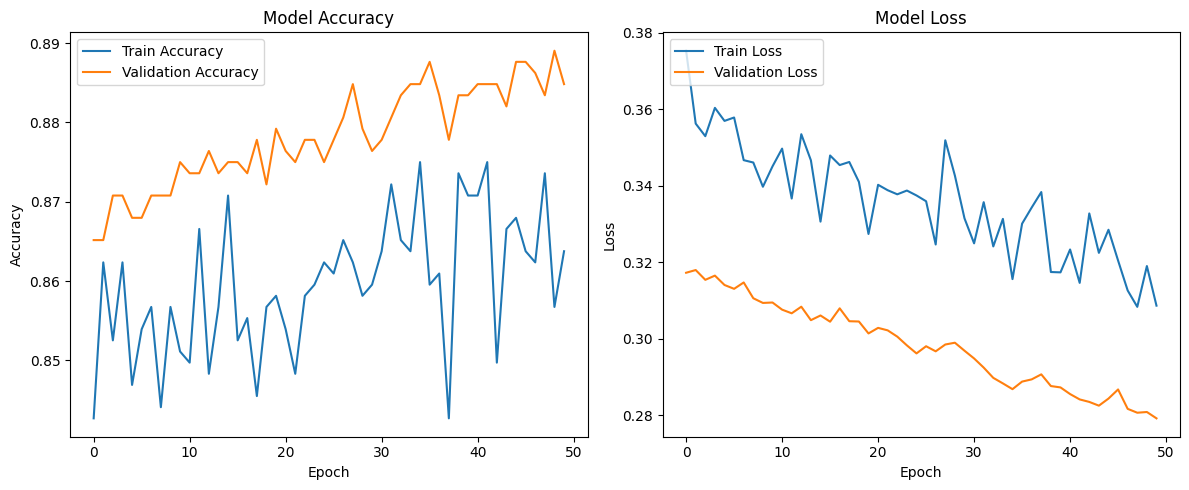

In [240]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()



#### 10. Model Selection

Now, I will use the best random forest model and the best XGBoost model to predict on the test data. Whichever performs better will be selected as the champion model.

##### Random Forest

In [ ]:
# Use random forest model to predict on test data
rf_test_preds = rf_cv.best_estimator_.predict(x_test)

> The next function will help to generate a table with the scores from the predictions made

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                          })

    return table

In [ ]:
# Get validation scores for RF model
rf_val_scores = get_test_scores('RF Test', rf_test_preds, y_test)

# Append to the results table
results = pd.concat([results, rf_val_scores], axis=0)
results

##### XGBoost Classifier

In [ ]:
# Use XGBoost model to predict on test data
xgb_test_preds = xgb_cv.best_estimator_.predict(x_test)

# Get test scores for XGBoost model
xgb_test_scores = get_test_scores('XGB test', xgb_test_preds, y_test)

# Append to the results table
results = pd.concat([results, xgb_test_scores], axis=0)
results

> Noticed that the Champion Model here is the `XGBoost Regressor` given that all scores indicate that performed better

#### 11. Use champion model to predict on test data

Next Step is to predic survivals on the unseen data. For this task I will use the `test.csv` file to load the data into x_test. I also must drop the same columns as I did before when working with `train.csv` to train the model, and encode the columns **Sex** and **Embarked**.

In [ ]:
# Using LabelEncoder to encode the categorical columns on df1
le = LabelEncoder()
df1['Sex'] = le.fit_transform(df1['Sex'])
df1['Embarked'] = le.fit_transform(df1['Embarked'])

# Make sure the length of x_test matches the length of the index
x_test = df1.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)


In [ ]:
# # Use XGBoost model to predict on test data
xgb_test_preds = xgb_cv.best_estimator_.predict(x_test)

Finally I will write to `.csv` for submission

In [ ]:
# Wtrite to csv file for submission to kaggle competition
submission = pd.DataFrame({'PassengerId': df1['PassengerId'], 'Survived': xgb_test_preds})
submission.to_csv('submission.csv', index=False)

In [ ]:
submission.tail()